In [1]:
import math
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from pandas import json_normalize
import yaml
from yaml import CSafeLoader as Loader

sns.set_context("paper", font_scale=3)

LOG_DIR = os.path.expanduser("~/jean-zay/emergent_communication/lightning_logs_final/")
# LOG_DIR = os.path.expanduser("~/PhD/emergent_communication/emergent_communication/lightning_logs_cluster/")

REFERENCE_METRIC = "val_acc"

In [2]:
import torch

# Remove superfluous NaN cells
def compress(values):
    for val in values:
        if val is not None and not np.isnan(val):
            return val
        
results_df = []
for run_dir in tqdm(os.listdir(LOG_DIR)):
    run_path = os.path.join(LOG_DIR, run_dir, "checkpoints/")

    results = glob.glob(run_path+f"*{REFERENCE_METRIC}=*.pickle")
    if len(results) < 1:
        run_path = os.path.join(LOG_DIR, run_dir)
        results = glob.glob(run_path+f"/*.pickle")
        if len(results) >= 1:
            print(f"considering pre-final results for run {run_dir[8:]}")
            if run_dir[8:] == "31521":
                print("gre")

    for result in results:
        try:
            data = pd.read_pickle(result)
        except Exception as e:
            print(result)
            print(e)
            continue
            
        if isinstance(data, list):
            df = pd.DataFrame.from_records(data)
            df = df.groupby(["dir_name", "epoch"]).aggregate(compress)
        else:
            if "receiver_aux_loss" in data.keys():
                data["receiver_auxiliary_loss"] = data["receiver_aux_loss"]
                del data["receiver_aux_loss"]
            df = pd.DataFrame.from_records([{k: v.item() if torch.is_tensor(v) else v for k, v in data.items()}])
        
        df["dir_name"] = run_dir
        if "epoch" in result:
            df["epoch"] = int(result.split("epoch=")[1].split("-")[0])
        results_df.append(df)


results_df = pd.concat(results_df, ignore_index=True)

results_df.reset_index(inplace=True)
results_df

  0%|          | 1/297 [00:00<01:58,  2.49it/s]

considering pre-final results for run 42218


  7%|▋         | 20/297 [00:05<01:08,  4.07it/s]

considering pre-final results for run 31649


  7%|▋         | 21/297 [00:05<01:19,  3.48it/s]

considering pre-final results for run 42201


  9%|▉         | 26/297 [00:06<01:07,  4.03it/s]

considering pre-final results for run 21572


 11%|█▏        | 34/297 [00:08<01:12,  3.65it/s]

considering pre-final results for run 31549


 14%|█▍        | 42/297 [00:10<00:57,  4.41it/s]

considering pre-final results for run 21573


 16%|█▌        | 47/297 [00:11<01:02,  4.01it/s]

considering pre-final results for run 31527


 17%|█▋        | 50/297 [00:12<01:08,  3.61it/s]

considering pre-final results for run 42204


 18%|█▊        | 54/297 [00:13<01:10,  3.47it/s]

considering pre-final results for run 42214


 21%|██        | 63/297 [00:15<00:54,  4.33it/s]

considering pre-final results for run 31544


 24%|██▍       | 71/297 [00:17<00:59,  3.83it/s]

considering pre-final results for run 31648


 25%|██▍       | 73/297 [00:18<01:04,  3.48it/s]

considering pre-final results for run 42299


 26%|██▌       | 76/297 [00:19<00:55,  3.96it/s]

considering pre-final results for run 42305


 26%|██▋       | 78/297 [00:20<01:39,  2.21it/s]

considering pre-final results for run 31521
gre


 28%|██▊       | 83/297 [00:23<01:54,  1.86it/s]

considering pre-final results for run 31524


 29%|██▉       | 86/297 [00:24<01:22,  2.57it/s]

considering pre-final results for run 31530


 29%|██▉       | 87/297 [00:24<01:14,  2.80it/s]

considering pre-final results for run 42222


 32%|███▏      | 95/297 [00:27<01:02,  3.22it/s]

considering pre-final results for run 42301


 32%|███▏      | 96/297 [00:27<01:04,  3.12it/s]

considering pre-final results for run 47547


 33%|███▎      | 99/297 [00:28<01:04,  3.07it/s]

considering pre-final results for run 22731


 34%|███▎      | 100/297 [00:28<01:01,  3.19it/s]

considering pre-final results for run 42294


 38%|███▊      | 112/297 [00:31<00:52,  3.53it/s]

considering pre-final results for run 31551


 38%|███▊      | 113/297 [00:32<00:59,  3.11it/s]

considering pre-final results for run 42307


 39%|███▉      | 116/297 [00:33<00:58,  3.08it/s]

considering pre-final results for run 31523


 40%|███▉      | 118/297 [00:33<00:57,  3.09it/s]

considering pre-final results for run 31558


 45%|████▌     | 134/297 [00:38<00:51,  3.16it/s]

considering pre-final results for run 47549


 45%|████▌     | 135/297 [00:39<01:16,  2.11it/s]

considering pre-final results for run 42197


 55%|█████▌    | 164/297 [00:47<00:34,  3.83it/s]

considering pre-final results for run 22252


 56%|█████▌    | 167/297 [00:48<00:37,  3.45it/s]

considering pre-final results for run 22255


 59%|█████▊    | 174/297 [00:50<00:36,  3.33it/s]

considering pre-final results for run 31552


 64%|██████▍   | 190/297 [00:55<00:40,  2.67it/s]

considering pre-final results for run 21796


 66%|██████▋   | 197/297 [00:57<00:26,  3.75it/s]

considering pre-final results for run 21794


 73%|███████▎  | 217/297 [01:03<00:20,  3.83it/s]

considering pre-final results for run 21795


 84%|████████▍ | 250/297 [01:12<00:14,  3.17it/s]

considering pre-final results for run 42309


 88%|████████▊ | 261/297 [01:15<00:09,  3.63it/s]

considering pre-final results for run 21570


 90%|████████▉ | 267/297 [01:17<00:09,  3.24it/s]

considering pre-final results for run 45838


 93%|█████████▎| 277/297 [01:20<00:06,  3.15it/s]

considering pre-final results for run 31526


100%|█████████▉| 296/297 [01:27<00:00,  1.87it/s]

considering pre-final results for run 31548


100%|██████████| 297/297 [01:27<00:00,  3.39it/s]

considering pre-final results for run 22254


,index,receiver_loss,entropy_loss,sender_policy_loss,train_acc,receiver_loss/dataloader_idx_0,entropy_loss/dataloader_idx_0,sender_policy_loss/dataloader_idx_0,receiver_loss/dataloader_idx_1,entropy_loss/dataloader_idx_1,...,posdis_sender_receiver,bosdis,bosdis_at_best_val_acc,bosdis_sender_receiver,receiver_auxiliary_loss/dataloader_idx_0,receiver_aux_acc/dataloader_idx_0,receiver_auxiliary_loss/dataloader_idx_1,receiver_aux_acc/dataloader_idx_1,receiver_auxiliary_loss,receiver_aux_acc
0,0,0.194861,0.000219,0.000847,0.871,0.123641,0.000284,0.008221,0.062122,0.000216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,0.685769,0.000169,0.057678,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.397343,0.000165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,0.510623,0.000295,0.120528,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.338628,0.000326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.394627,0.000146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,543,NaN,NaN,NaN,NaN,0.369399,0.000382,0.160376,NaN,NaN,...,NaN,NaN,NaN,NaN,4.779543e-05,1.0,NaN,NaN,NaN,NaN
544,544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.182042,0.000388,...,NaN,NaN,NaN,NaN,NaN,NaN,3.258505e-05,1.0,NaN,NaN
545,545,0.037734,0.000165,0.002094,0.971,0.020548,0.000879,0.011803,0.002694,0.001468,...,NaN,NaN,NaN,NaN,6.690921e-07,1.0,3.672929e-07,1.0,0.000001,1.0


In [3]:
hp = []
for run_dir in tqdm(os.listdir(LOG_DIR)):
    file_path = os.path.join(LOG_DIR, run_dir, "hparams.yaml")
    file = yaml.load(open(file_path), Loader=Loader) #safe_load(, Loader=Loader)
    df = json_normalize(file)
    df["dir_name"] = run_dir
    hp.append(df)

hp = pd.concat(hp, ignore_index=True)
hp

100%|██████████| 297/297 [00:52<00:00,  5.70it/s]


,accelerator,accumulate_grad_batches,amp_backend,amp_level,auto_lr_find,auto_scale_batch_size,auto_select_gpus,baseline_type,batch_size,benchmark,...,test_set_size,tpu_cores,track_grad_norm,update_masks,val_check_interval,val_set_size,vocab_size,vocab_size_feedback,dir_name,receiver_ignore_candidates_for_feedback
0,gpu,None,None,None,False,False,None,mean,1000,None,...,0.0,None,-1,False,None,0.1,2,100,version_42218,NaN
1,gpu,None,None,None,False,False,None,mean,1000,None,...,0.0,None,-1,False,None,0.1,2,100,version_41781,NaN
2,gpu,None,None,None,False,False,None,mean,1000,None,...,0.0,None,-1,False,None,0.1,2,2,version_36088,NaN
3,gpu,None,None,None,False,False,None,mean,1000,None,...,0.0,None,-1,False,None,0.1,2,2,version_50913,NaN
4,gpu,None,None,None,False,False,None,mean,1000,None,...,0.0,None,-1,False,None,0.1,2,2,version_40703,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,gpu,None,None,None,False,False,None,mean,1000,None,...,0.0,None,-1,False,None,0.1,2,2,version_40734,NaN
293,gpu,None,None,None,False,False,None,mean,1000,None,...,0.0,None,-1,False,None,0.1,2,2,version_48667,NaN
294,gpu,None,None,None,False,False,None,mean,1000,None,...,0.0,None,-1,False,None,0.1,2,2,version_36086,NaN
295,gpu,None,None,None,False,False,None,mean,1000,None,...,0.0,None,-1,False,None,0.1,2,2,version_31548,NaN


In [4]:
def fix_duplicate_value(val, allow_offset=None):
    if isinstance(val, list):
        for el in val:
            if allow_offset is None:
                assert (el == val[0]) or (el == "None") or (val[0] == "None")
            else:
                assert (np.abs(el - val[0]) < allow_offset) or (el == "None") or (val[0] == "None")
        return val[0]
    else:
        return val

hp = hp.applymap(fix_duplicate_value)

In [5]:
indices_best_steps = results_df.groupby("dir_name")[REFERENCE_METRIC].idxmax()

df = results_df.loc[list(indices_best_steps)].copy()
df

,index,receiver_loss,entropy_loss,sender_policy_loss,train_acc,receiver_loss/dataloader_idx_0,entropy_loss/dataloader_idx_0,sender_policy_loss/dataloader_idx_0,receiver_loss/dataloader_idx_1,entropy_loss/dataloader_idx_1,...,posdis_sender_receiver,bosdis,bosdis_at_best_val_acc,bosdis_sender_receiver,receiver_auxiliary_loss/dataloader_idx_0,receiver_aux_acc/dataloader_idx_0,receiver_auxiliary_loss/dataloader_idx_1,receiver_aux_acc/dataloader_idx_1,receiver_auxiliary_loss,receiver_aux_acc
372,372,NaN,NaN,NaN,NaN,0.384234,2.226400e-08,0.000002,NaN,NaN,...,NaN,0.070548,0.070548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,509,NaN,NaN,NaN,NaN,0.362156,9.622735e-08,0.000008,NaN,NaN,...,NaN,0.051417,0.051417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,171,NaN,NaN,NaN,NaN,0.202533,2.926513e-07,0.000033,NaN,NaN,...,NaN,0.069486,0.069486,NaN,1.119691e-06,1.0,NaN,NaN,NaN,NaN
478,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,NaN,NaN,NaN,NaN,0.953558,8.165120e-05,0.047773,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,85,NaN,NaN,NaN,NaN,2.510280,4.783838e-04,0.261667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,142,NaN,NaN,NaN,NaN,0.105239,4.796509e-04,0.200478,NaN,NaN,...,0.196989,0.120562,0.120562,0.120562,1.833674e-05,1.0,NaN,NaN,NaN,NaN
464,464,NaN,NaN,NaN,NaN,0.104471,3.155604e-04,0.174833,NaN,NaN,...,0.320076,0.074878,0.074878,0.074878,6.804366e-07,1.0,NaN,NaN,NaN,NaN


In [6]:
df.set_index("dir_name", inplace=True, drop=False)
if not hp.index.name == "dir_name":
    hp.set_index("dir_name", inplace=True, verify_integrity=True)
df = df.join(hp, how="left")

In [7]:
assert (df.sender_entropy_coeff == df.receiver_entropy_coeff).all()
assert (df.num_senders == df.num_receivers).all()
assert (df.sender_layer_norm == df.receiver_layer_norm).all()

df["entropy_coeff"] = df["sender_entropy_coeff"]
df["num_agents"] = df["num_senders"]
df["layer_norm"] = df["sender_layer_norm"]

df["attr_val"] = df["num_attributes"].map(int).map(str) + "_" + df["num_values"].map(int).map(str)

data = df

In [8]:
def calc_capacity(row):
    return math.pow(row.num_values, row.num_attributes)

data["capacity"] = data.apply(calc_capacity, axis=1)
data.sort_values("capacity", inplace=True)

In [9]:
data["test_acc"] = data["val_acc"]
data["test_acc_no_noise"] = data["val_acc_no_noise"]

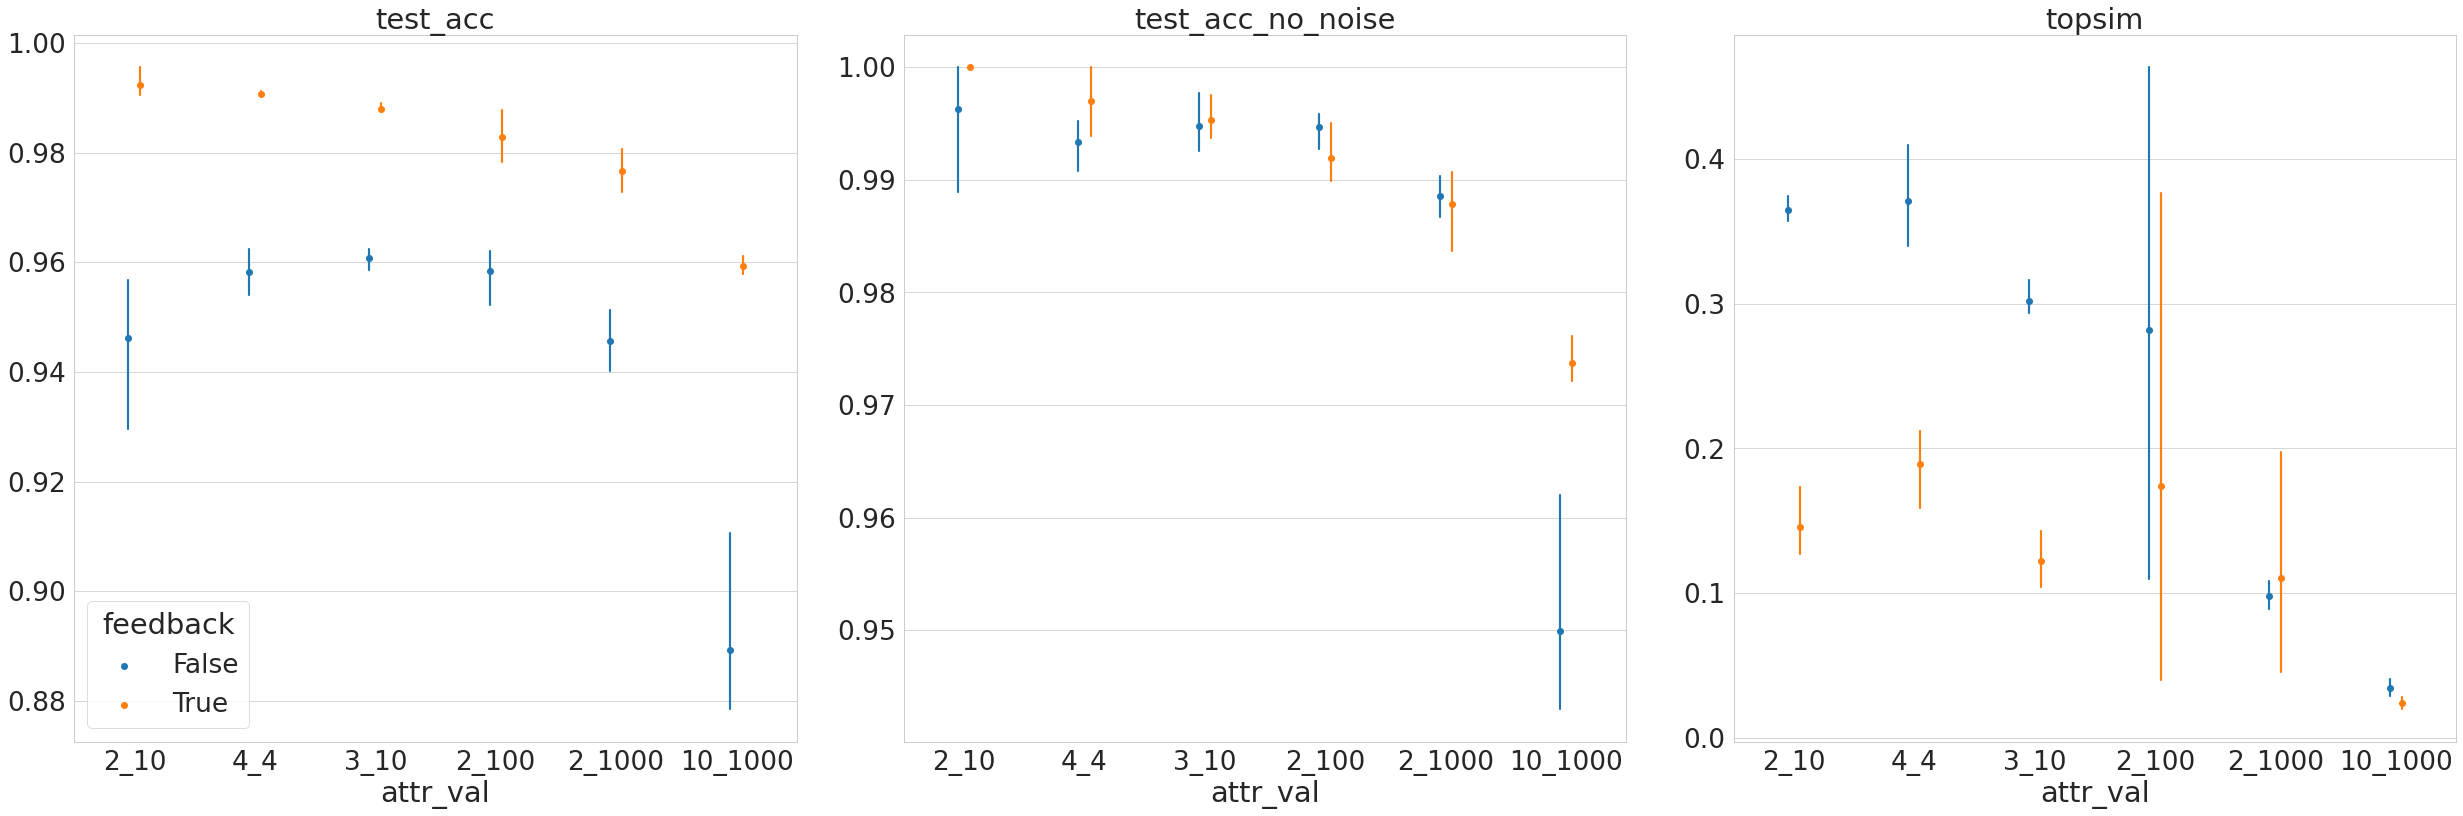

In [32]:
data["condition"] = data["noise"].map(lambda x: f"noise_{x}" if x > 0 else "baseline") + data["feedback"].map(lambda x: "_feedback" if x else "") + data["receiver_aux_loss"].map(lambda x: "_aux_loss" if x else "")

target_data = data.copy()

target_data = target_data[target_data.receiver_aux_loss == False]

NUM_AGENTS = 1
target_data = target_data[target_data.num_agents == NUM_AGENTS]

MAX_LEN = 10
target_data = target_data[target_data.max_len == MAX_LEN]

NOISE = 0.5
target_data = target_data[target_data.noise == NOISE]

VOCAB_SIZE = 2
target_data = target_data[target_data.vocab_size == VOCAB_SIZE]

VOCAB_SIZE_FEEDBACK = 2
target_data = target_data[(target_data.vocab_size_feedback == VOCAB_SIZE_FEEDBACK) | (target_data.feedback == False)]

LAYER_NORM = 1
target_data = target_data[target_data.layer_norm == LAYER_NORM]

DISCRIMINATION_NUM_OBJECTS = 2
target_data = target_data[target_data.discrimination_num_objects == DISCRIMINATION_NUM_OBJECTS]

# hue_order = None
# hue_order = ["baseline", "noise_0.1"]
hue_order = ["noise_0.5", "noise_0.5_feedback", "noise_0.5_feedback_aux_loss"]

# order = ["2_10", "3_5", "2_16", "4_4", "4_5", "3_10", "2_100"]
# order = ["2_100", "4_100", "10_100"]
order = ["2_10", "4_4", "3_10", "2_100", "2_1000", "10_1000"]

target_hparam = "attr_val"

num_runs_data = target_data.groupby(["attr_val", "condition"]).size().reset_index()


metrics = ["test_acc", "test_acc_no_noise", "topsim"]
# metrics = ["test_acc", "topsim", "topsim_sender_receiver", "posdis", "bosdis", "test_acc_no_noise", "train_acc_no_noise"]
_, axes = plt.subplots(1, len(metrics), figsize=(35, 12))

for value in order:
    for fb in [False, True]:
        d = target_data[(target_data[target_hparam] == value) & (target_data["feedback"] == fb)]
        if len(d) != 3:
            print(f"Unexpected number of datapoints: {len(d)}")
            print(value)
            print(fb)
            print(d)

for i, metric in enumerate(metrics):
    axis = axes[i]
    # g = sns.barplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue="feedback", dodge=True)
    g = sns.pointplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue="feedback", errorbar="se", linestyles="", dodge=0.1)

    if not i == 0:
        g.legend().remove()
    else:
        sns.move_legend(axis, "lower left")
    axis.set_title(metric)
    axis.set_ylabel("")
    # handles, labels = ax.get_legend_handles_labels()
    # num_conditions = int(len(handles)/2) if not hue_order else len(hue_order)

plt.tight_layout()
plt.savefig("plots/effect_of_attr_val.pdf", dpi=300)


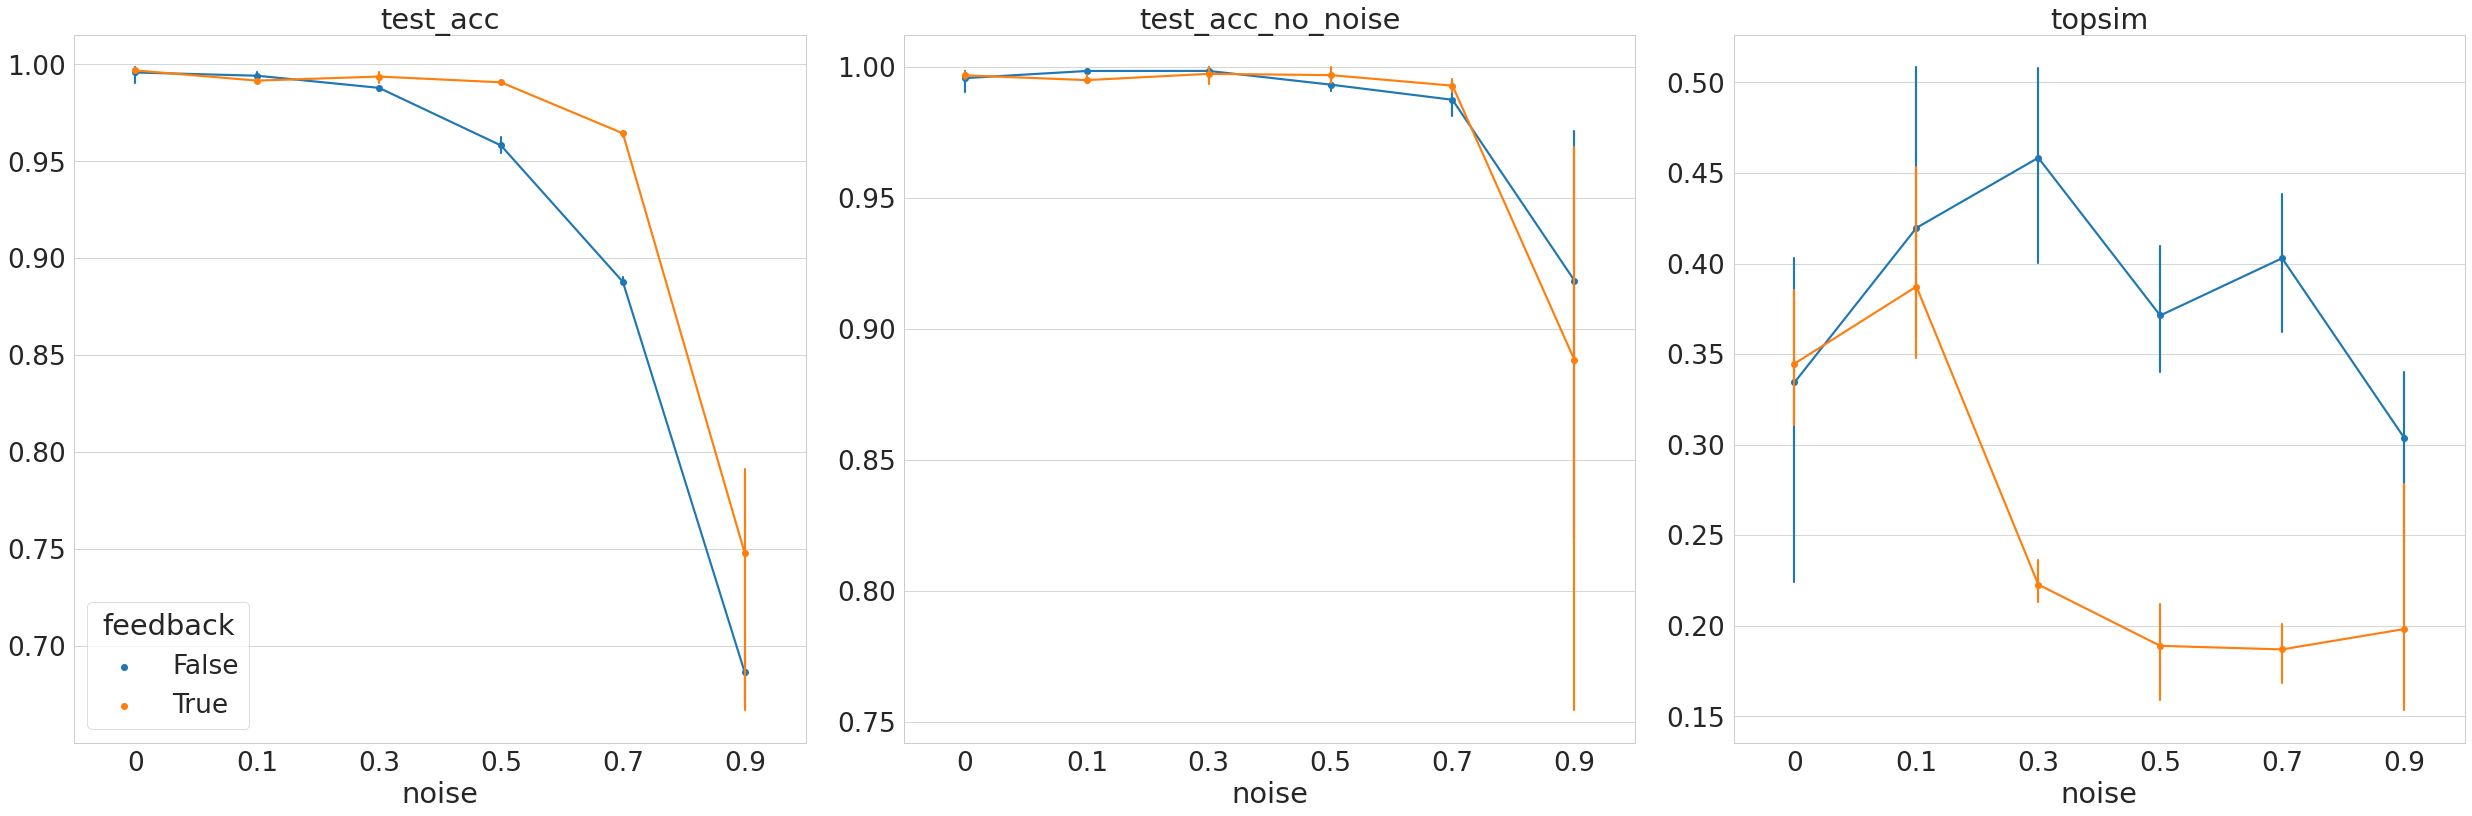

In [31]:
target_data = data.copy()

target_data = target_data[target_data.receiver_aux_loss == False]

NUM_AGENTS = 1
target_data = target_data[target_data.num_agents == NUM_AGENTS]

MAX_LEN = 10
target_data = target_data[target_data.max_len == MAX_LEN]

VOCAB_SIZE = 2
target_data = target_data[target_data.vocab_size == VOCAB_SIZE]

VOCAB_SIZE_FEEDBACK = 2
target_data = target_data[(target_data.vocab_size_feedback == VOCAB_SIZE_FEEDBACK) | (target_data.feedback == False)]

LAYER_NORM = 1
target_data = target_data[target_data.layer_norm == LAYER_NORM]

DISCRIMINATION_NUM_OBJECTS = 2
target_data = target_data[target_data.discrimination_num_objects == DISCRIMINATION_NUM_OBJECTS]

ATTR_VAL = "4_4"
# ATTR_VAL = "3_10"

target_data = target_data[(target_data["attr_val"] == ATTR_VAL)]

# print(target_data.dir_name.unique())
target_hparam = "noise"
order = [0, 0.1, 0.3, 0.5, 0.7, 0.9]


num_runs_data = target_data.groupby(["attr_val", "condition"]).size().reset_index()

metrics = ["test_acc", "test_acc_no_noise", "topsim"]
# metrics = ["test_acc", "topsim", "topsim_sender_receiver", "posdis", "bosdis", "test_acc_no_noise", "train_acc_no_noise"]
_, axes = plt.subplots(1, len(metrics), figsize=(35, 12))

hue_variable = "feedback"
for value in order:
    for fb in [False, True]:
        d = target_data[(target_data[target_hparam] == value) & (target_data[hue_variable] == fb)]
        if len(d) != 3:
            print(f"Unexpected number of datapoints: {len(d)}")
            print(value)
            print(fb)

for i, metric in enumerate(metrics):
    axis = axes[i]
    # g = sns.barplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue=hue_variable, dodge=True)
    g = sns.pointplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue=hue_variable, errorbar="se")

    if not i == 0:
        g.legend().remove()
    else:
        sns.move_legend(axis, "lower left")
    axis.set_title(metric)
    axis.set_ylabel("")

plt.tight_layout()
plt.savefig("plots/effect_of_noise.pdf", dpi=300)

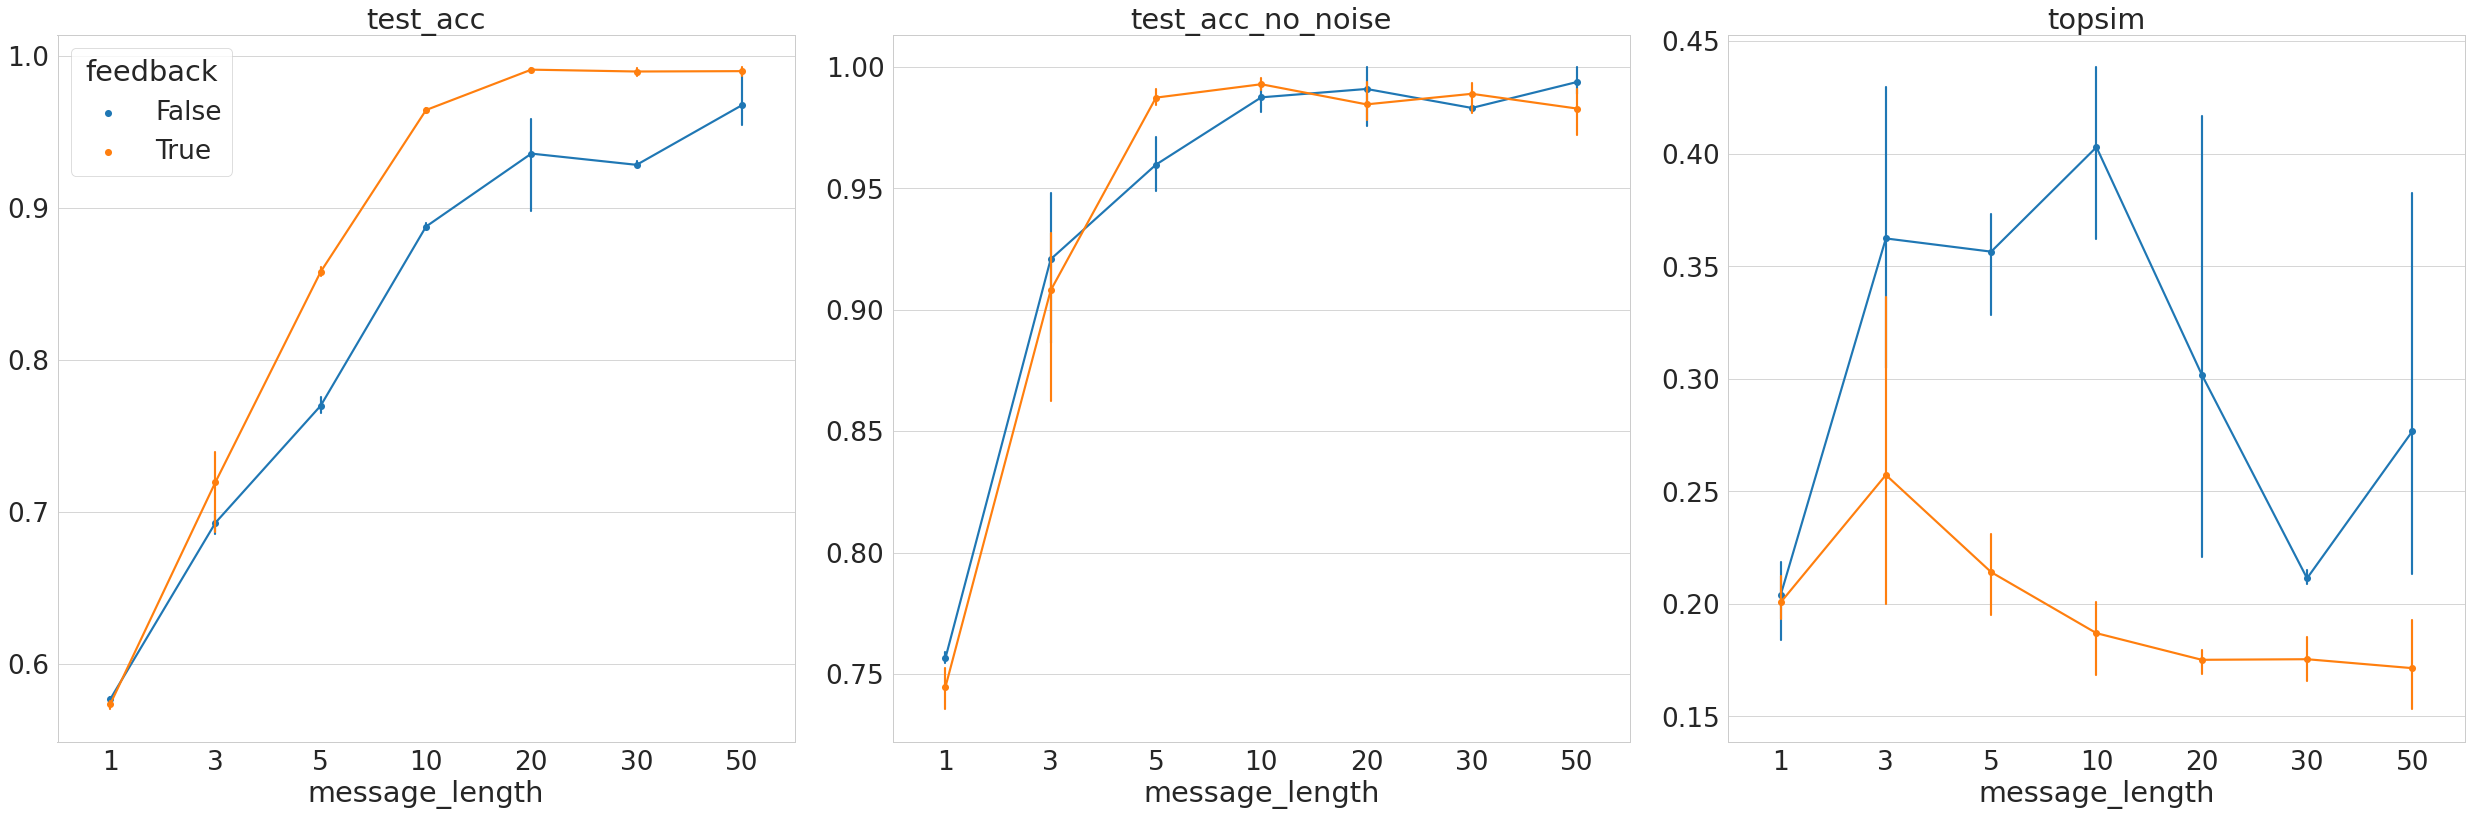

In [30]:
target_data = data.copy()

target_data = target_data[target_data.receiver_aux_loss == False]

NUM_AGENTS = 1
target_data = target_data[target_data.num_agents == NUM_AGENTS]

NOISE = 0.7
target_data = target_data[target_data.noise == NOISE]

VOCAB_SIZE = 2
target_data = target_data[target_data.vocab_size == VOCAB_SIZE]

VOCAB_SIZE_FEEDBACK = 2
target_data = target_data[(target_data.vocab_size_feedback == VOCAB_SIZE_FEEDBACK) | (target_data.feedback == False)]

LAYER_NORM = 1
target_data = target_data[target_data.layer_norm == LAYER_NORM]

DISCRIMINATION_NUM_OBJECTS = 2
target_data = target_data[target_data.discrimination_num_objects == DISCRIMINATION_NUM_OBJECTS]

ATTR_VAL = "4_4"

target_data = target_data[(target_data["attr_val"] == ATTR_VAL)]

# target_hparam = "attr_val"
# order = ["2_10", "4_4", "2_100", "2_1000"]
target_hparam = "max_len"
order = [1, 3, 5, 10, 20, 30, 50]


num_runs_data = target_data.groupby(["attr_val", "condition"]).size().reset_index()

metrics = ["test_acc", "test_acc_no_noise", "topsim"]
# metrics = ["test_acc", "topsim", "topsim_sender_receiver", "posdis", "bosdis", "test_acc_no_noise", "train_acc_no_noise"]
_, axes = plt.subplots(1, len(metrics), figsize=(35, 12))

hue_variable = "feedback"
for value in order:
    for fb in [False, True]:
        d = target_data[(target_data[target_hparam] == value) & (target_data[hue_variable] == fb)]
        if len(d) != 3:
            print(f"Unexpected number of datapoints: {len(d)}")
            print(value)
            print(fb)
            
for i, metric in enumerate(metrics):
    axis = axes[i]
    # g = sns.barplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue="feedback", dodge=True)
    g = sns.pointplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue=hue_variable, errorbar="se")

    if not i == 0:
        g.legend().remove()
    else:
        sns.move_legend(axis, "upper left")
    axis.set_title(metric)
    axis.set_ylabel("")
    axis.set_xlabel("message_length")


plt.tight_layout()
plt.savefig("plots/effect_of_message_length.pdf", dpi=300)

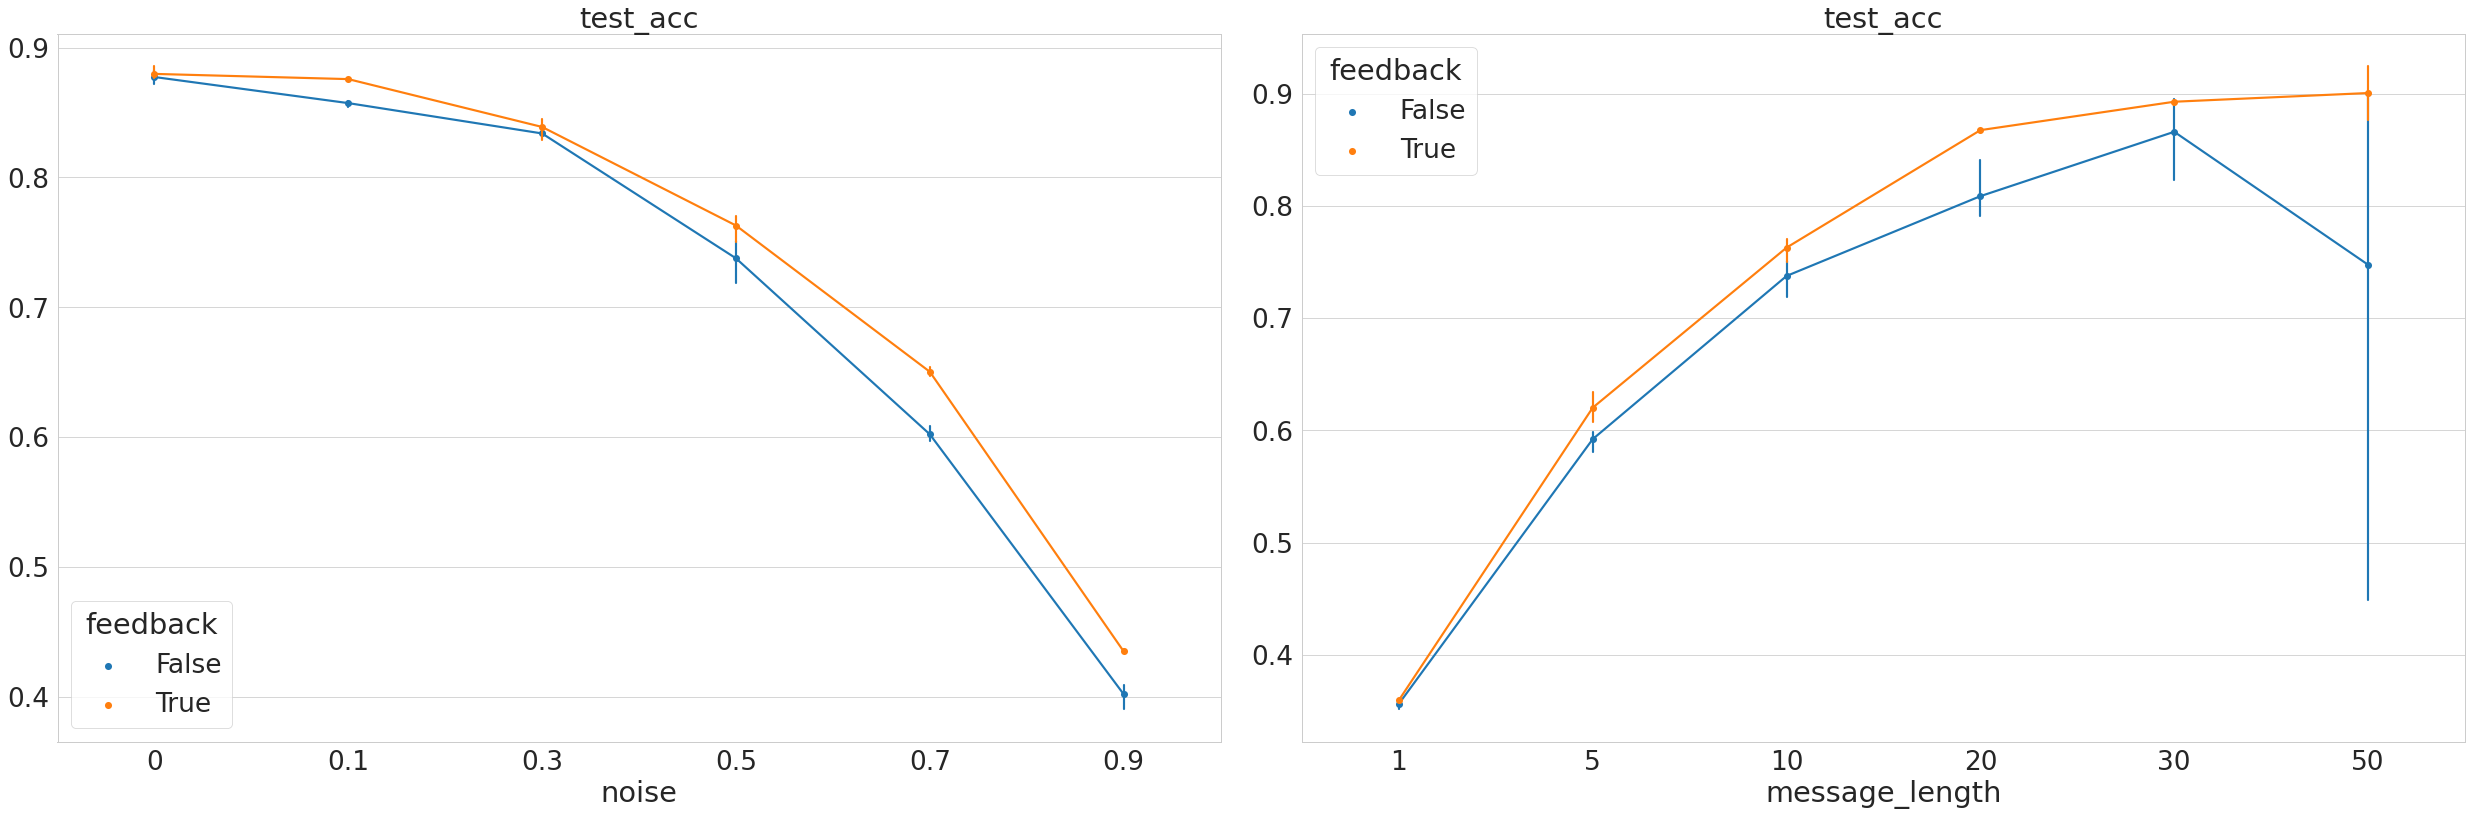

In [29]:
target_data = data.copy()

target_data = target_data[target_data.guesswhat == True]

target_data = target_data[target_data.receiver_output_attention == False]
target_data = target_data[target_data.receiver_object_attention == False]
target_data = target_data[target_data.sender_attention == False]

target_data = target_data[(target_data.receiver_aux_loss == False)]

NUM_AGENTS = 1
target_data = target_data[target_data.num_agents == NUM_AGENTS]

MAX_LEN = 10
target_data = target_data[target_data.max_len == MAX_LEN]

VOCAB_SIZE = 2
target_data = target_data[target_data.vocab_size == VOCAB_SIZE]

VOCAB_SIZE_FEEDBACK = 2
target_data = target_data[(target_data.vocab_size_feedback == VOCAB_SIZE_FEEDBACK) | (target_data.feedback == False)]

LAYER_NORM = 1
target_data = target_data[target_data.layer_norm == LAYER_NORM]

DISCRIMINATION_NUM_OBJECTS = 10
target_data = target_data[target_data.discrimination_num_objects == DISCRIMINATION_NUM_OBJECTS]

# target_hparam = "attr_val"
# order = ["2_10", "4_4", "2_100", "2_1000"]
target_hparam = "noise"
order = [0, 0.1, 0.3, 0.5, 0.7, 0.9]

metrics = ["test_acc"] #test_acc_no_noise
_, axes = plt.subplots(1, len(metrics)*2, figsize=(35, 12))

hue_variable = "feedback"
for value in order:
    for fb in [False, True]:
        d = target_data[(target_data[target_hparam] == value) & (target_data[hue_variable] == fb)]
        if len(d) != 3:
            print(f"Unexpected number of datapoints: {len(d)}")
            print(value)
            print(fb)
            
for i, metric in enumerate(metrics):
    axis = axes[i]
    # g = sns.barplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue="feedback", dodge=True)
    g = sns.pointplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue=hue_variable, errorbar="se")

    if not i == 0:
        g.legend().remove()
    else:
        sns.move_legend(axis, "lower left")
    axis.set_title(metric)
    axis.set_ylabel("")
    # axis.set_ylim((0, 1))


###
# SECOND HALF
###

target_data = data.copy()

target_data = target_data[target_data.guesswhat == True]

target_data = target_data[target_data.receiver_output_attention == False]
target_data = target_data[target_data.receiver_object_attention == False]
target_data = target_data[target_data.sender_attention == False]

target_data = target_data[target_data.receiver_aux_loss == False]


NUM_AGENTS = 1
target_data = target_data[target_data.num_agents == NUM_AGENTS]

NOISE = 0.5
target_data = target_data[target_data.noise == NOISE]

VOCAB_SIZE = 2
target_data = target_data[target_data.vocab_size == VOCAB_SIZE]

VOCAB_SIZE_FEEDBACK = 2
target_data = target_data[(target_data.vocab_size_feedback == VOCAB_SIZE_FEEDBACK) | (target_data.feedback == False)]

LAYER_NORM = 1
target_data = target_data[target_data.layer_norm == LAYER_NORM]

DISCRIMINATION_NUM_OBJECTS = 10
target_data = target_data[target_data.discrimination_num_objects == DISCRIMINATION_NUM_OBJECTS]

# target_hparam = "attr_val"
# order = ["2_10", "4_4", "2_100", "2_1000"]
target_hparam = "max_len"
order = [1, 5, 10, 20, 30, 50]

metrics = ["test_acc"] #test_acc_no_noise

hue_variable = "feedback"
for value in order:
    for fb in [False, True]:
        d = target_data[(target_data[target_hparam] == value) & (target_data[hue_variable] == fb)]
        if len(d) != 3:
            print(f"Unexpected number of datapoints: {len(d)}")
            print(value)
            print(fb)

for i, metric in enumerate(metrics):
    axis = axes[i+len(metrics)]
    # g = sns.barplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue="feedback", dodge=True)
    g = sns.pointplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue=hue_variable, errorbar="se")

    if not i == 0:
        g.legend().remove()
    else:
        sns.move_legend(axis, "upper left")
    axis.set_title(metric)
    axis.set_ylabel("")
    axis.set_xlabel("message_length")

# axis.set_ylim((0, 1))

plt.tight_layout()
plt.savefig("plots/guesswhat.pdf", dpi=300)

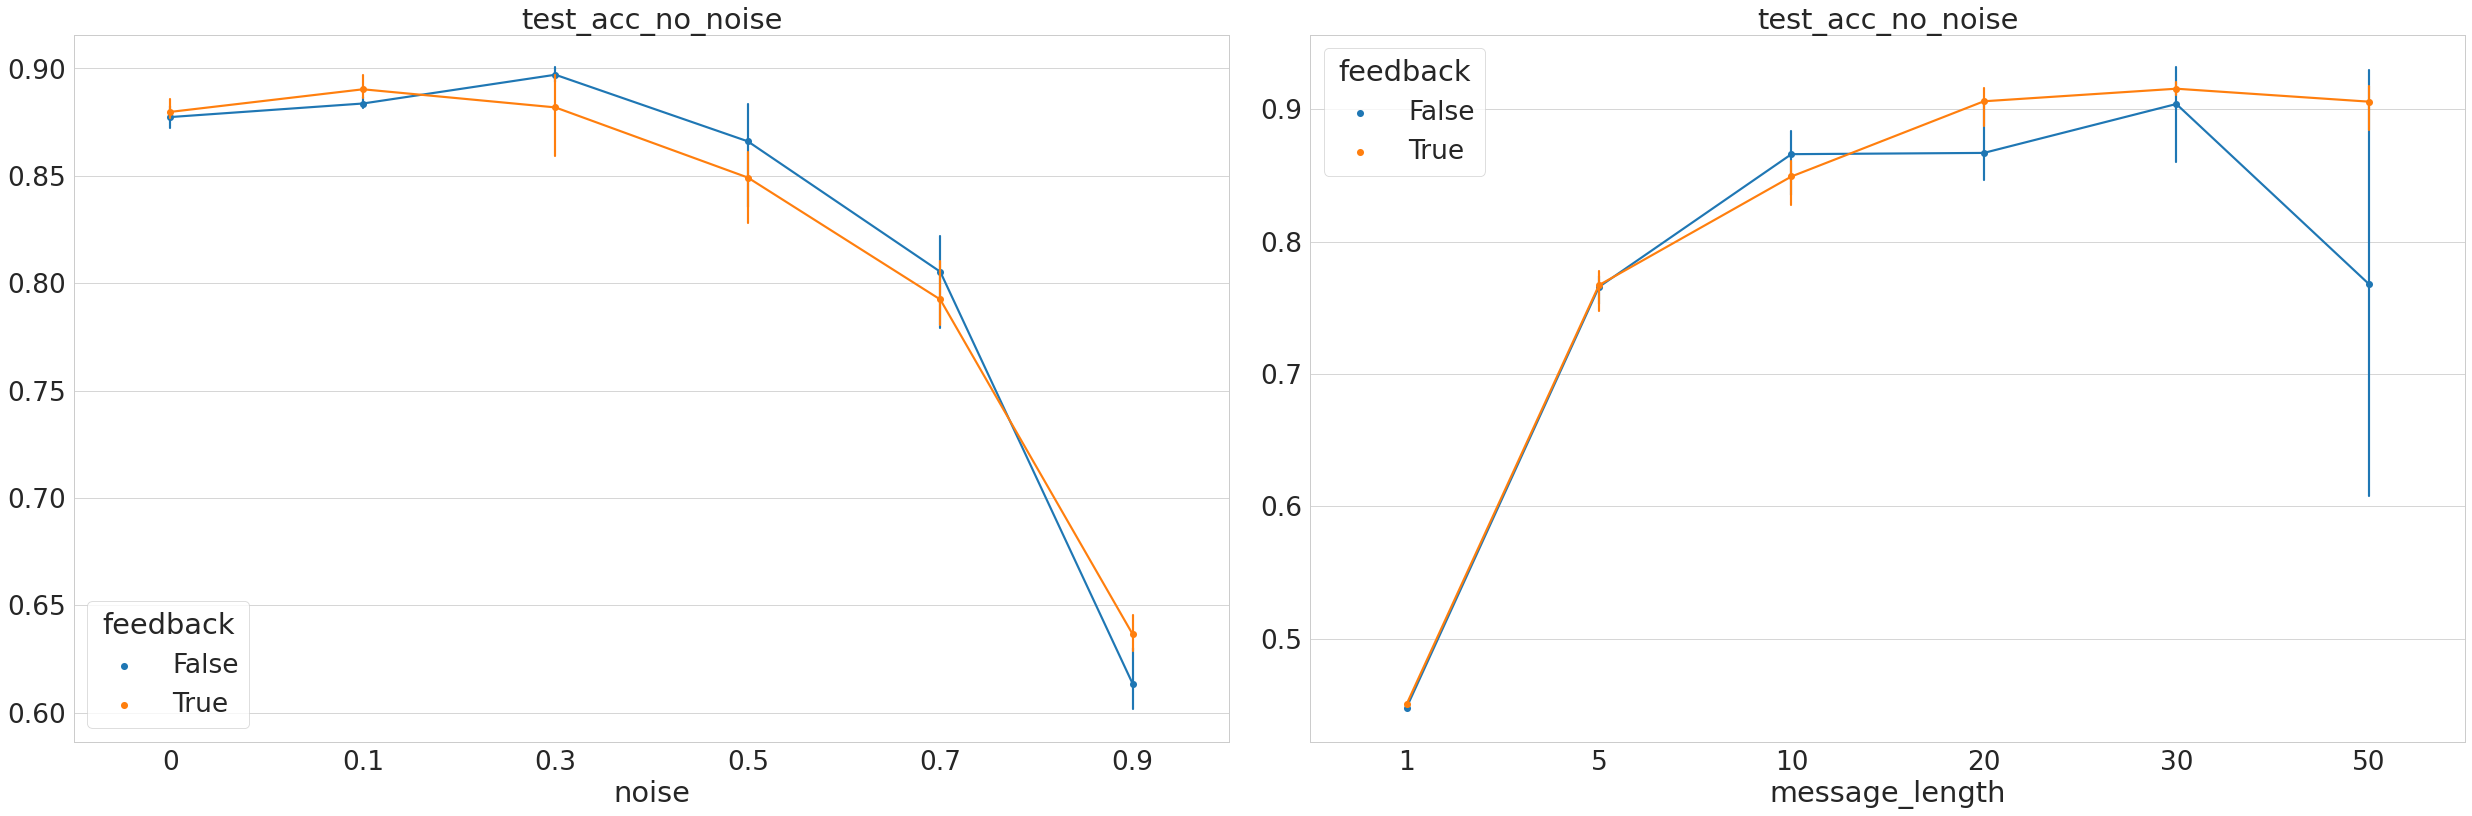

In [33]:
target_data = data.copy()

target_data = target_data[target_data.guesswhat == True]

target_data = target_data[target_data.receiver_output_attention == False]
target_data = target_data[target_data.receiver_object_attention == False]
target_data = target_data[target_data.sender_attention == False]

target_data = target_data[(target_data.receiver_aux_loss == False)]

NUM_AGENTS = 1
target_data = target_data[target_data.num_agents == NUM_AGENTS]

MAX_LEN = 10
target_data = target_data[target_data.max_len == MAX_LEN]

VOCAB_SIZE = 2
target_data = target_data[target_data.vocab_size == VOCAB_SIZE]

VOCAB_SIZE_FEEDBACK = 2
target_data = target_data[(target_data.vocab_size_feedback == VOCAB_SIZE_FEEDBACK) | (target_data.feedback == False)]

LAYER_NORM = 1
target_data = target_data[target_data.layer_norm == LAYER_NORM]

DISCRIMINATION_NUM_OBJECTS = 10
target_data = target_data[target_data.discrimination_num_objects == DISCRIMINATION_NUM_OBJECTS]

# target_hparam = "attr_val"
# order = ["2_10", "4_4", "2_100", "2_1000"]
target_hparam = "noise"
order = [0, 0.1, 0.3, 0.5, 0.7, 0.9]

metrics = ["test_acc_no_noise"] #
_, axes = plt.subplots(1, len(metrics)*2, figsize=(35, 12))

hue_variable = "feedback"
for value in order:
    for fb in [False, True]:
        d = target_data[(target_data[target_hparam] == value) & (target_data[hue_variable] == fb)]
        if len(d) != 3:
            print(f"Unexpected number of datapoints: {len(d)}")
            print(value)
            print(fb)

for i, metric in enumerate(metrics):
    axis = axes[i]
    # g = sns.barplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue="feedback", dodge=True)
    g = sns.pointplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue=hue_variable, errorbar="se")

    if not i == 0:
        g.legend().remove()
    else:
        sns.move_legend(axis, "lower left")
    axis.set_title(metric)
    axis.set_ylabel("")
    # axis.set_ylim((0, 1))


###
# SECOND HALF
###

target_data = data.copy()

target_data = target_data[target_data.guesswhat == True]

target_data = target_data[target_data.receiver_output_attention == False]
target_data = target_data[target_data.receiver_object_attention == False]
target_data = target_data[target_data.sender_attention == False]

target_data = target_data[target_data.receiver_aux_loss == False]


NUM_AGENTS = 1
target_data = target_data[target_data.num_agents == NUM_AGENTS]

NOISE = 0.5
target_data = target_data[target_data.noise == NOISE]

VOCAB_SIZE = 2
target_data = target_data[target_data.vocab_size == VOCAB_SIZE]

VOCAB_SIZE_FEEDBACK = 2
target_data = target_data[(target_data.vocab_size_feedback == VOCAB_SIZE_FEEDBACK) | (target_data.feedback == False)]

LAYER_NORM = 1
target_data = target_data[target_data.layer_norm == LAYER_NORM]

DISCRIMINATION_NUM_OBJECTS = 10
target_data = target_data[target_data.discrimination_num_objects == DISCRIMINATION_NUM_OBJECTS]

# target_hparam = "attr_val"
# order = ["2_10", "4_4", "2_100", "2_1000"]
target_hparam = "max_len"
order = [1, 5, 10, 20, 30, 50]

metrics = ["test_acc_no_noise"] #

hue_variable = "feedback"
for value in order:
    for fb in [False, True]:
        d = target_data[(target_data[target_hparam] == value) & (target_data[hue_variable] == fb)]
        if len(d) != 3:
            print(f"Unexpected number of datapoints: {len(d)}")
            print(value)
            print(fb)

for i, metric in enumerate(metrics):
    axis = axes[i+len(metrics)]
    # g = sns.barplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue="feedback", dodge=True)
    g = sns.pointplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue=hue_variable, errorbar="se")

    if not i == 0:
        g.legend().remove()
    else:
        sns.move_legend(axis, "upper left")
    axis.set_title(metric)
    axis.set_ylabel("")
    axis.set_xlabel("message_length")

# axis.set_ylim((0, 1))

plt.tight_layout()
plt.savefig("plots/guesswhat_no_noise.pdf", dpi=300)

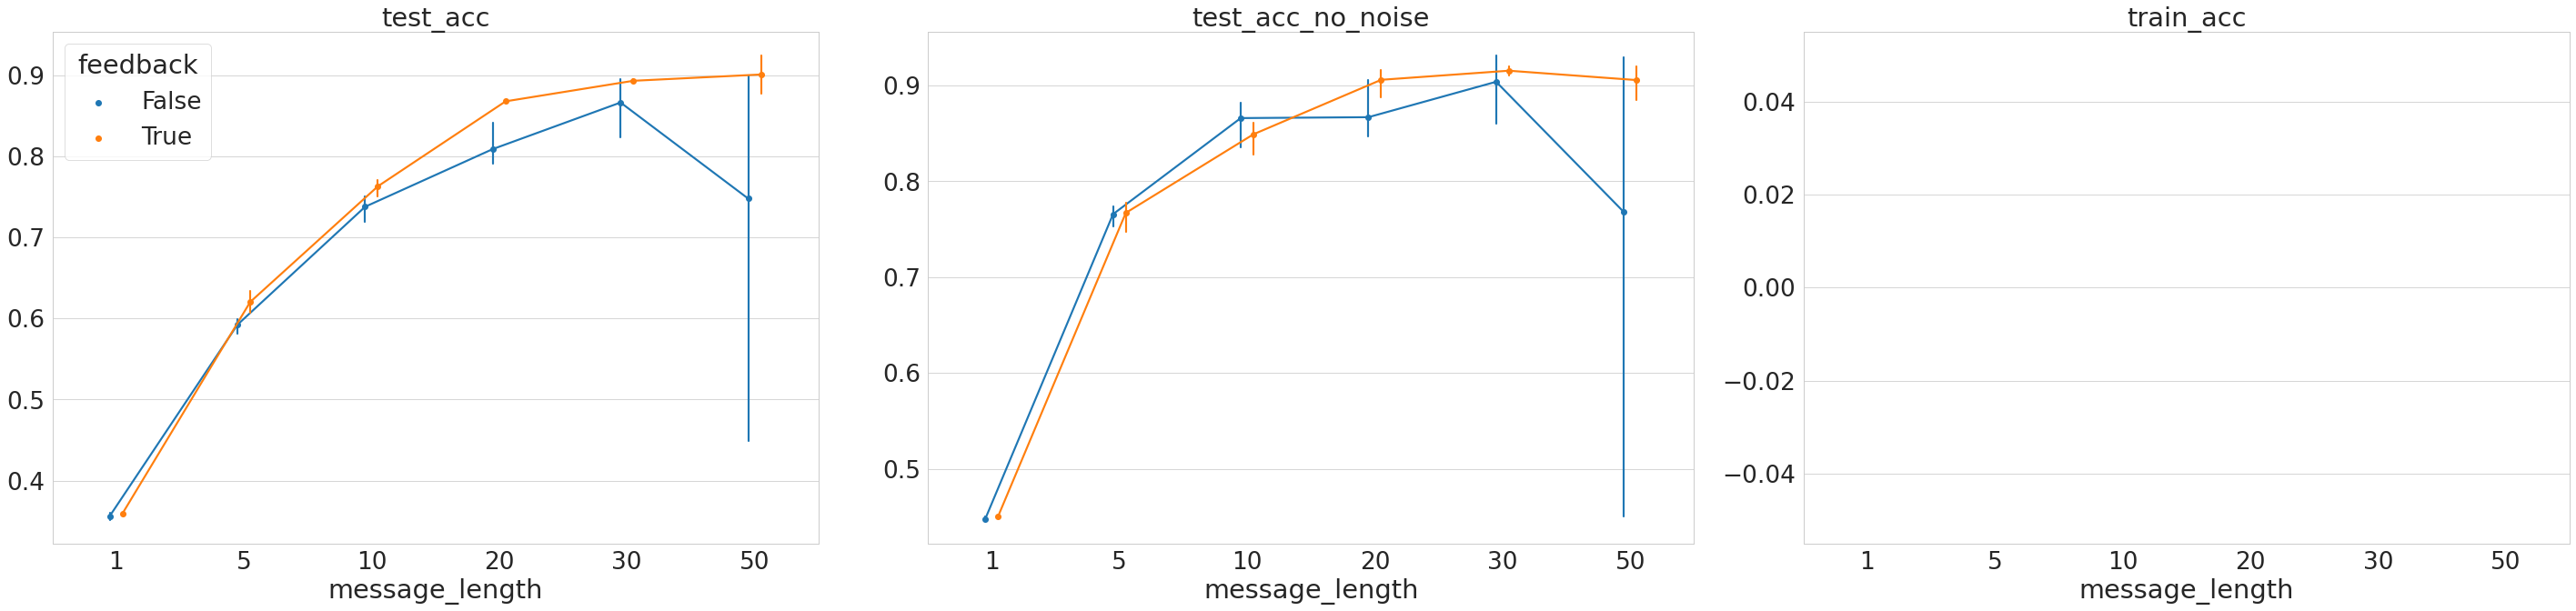

In [27]:
target_data = data.copy()

target_data = target_data[target_data.guesswhat == True]

target_data = target_data[target_data.receiver_output_attention == False]
target_data = target_data[target_data.receiver_object_attention == False]
target_data = target_data[target_data.sender_attention == False]

target_data = target_data[target_data.receiver_aux_loss == False]


NUM_AGENTS = 1
target_data = target_data[target_data.num_agents == NUM_AGENTS]

NOISE = 0.5
target_data = target_data[target_data.noise == NOISE]

VOCAB_SIZE = 2
target_data = target_data[target_data.vocab_size == VOCAB_SIZE]

VOCAB_SIZE_FEEDBACK = 2
target_data = target_data[(target_data.vocab_size_feedback == VOCAB_SIZE_FEEDBACK) | (target_data.feedback == False)]

LAYER_NORM = 1
target_data = target_data[target_data.layer_norm == LAYER_NORM]

DISCRIMINATION_NUM_OBJECTS = 10
target_data = target_data[target_data.discrimination_num_objects == DISCRIMINATION_NUM_OBJECTS]

# target_hparam = "attr_val"
# order = ["2_10", "4_4", "2_100", "2_1000"]
target_hparam = "max_len"
order = [1, 5, 10, 20, 30, 50]

metrics = ["test_acc", "test_acc_no_noise", "train_acc"]
# metrics = ["test_acc", "topsim", "topsim_sender_receiver", "posdis", "bosdis", "test_acc_no_noise", "train_acc_no_noise"]
_, axes = plt.subplots(1, len(metrics), figsize=(35, 10))

hue_variable = "feedback"
for value in order:
    for fb in [False, True]:
        d = target_data[(target_data[target_hparam] == value) & (target_data[hue_variable] == fb)]
        if len(d) != 3:
            print(f"Unexpected number of datapoints: {len(d)}")
            print(value)
            print(fb)
            
for i, metric in enumerate(metrics):
    axis = axes[i]
    # g = sns.barplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue="feedback", dodge=True)
    g = sns.pointplot(ax=axis, data=target_data, x=target_hparam, y=metric, order=order, hue=hue_variable, errorbar="se", dodge=0.1)

    if not i == 0:
        g.legend().remove()
    else:
        sns.move_legend(axis, "upper left")
    axis.set_title(metric)
    axis.set_ylabel("")
    axis.set_xlabel("message_length")

# axis.set_ylim((0, 1))

plt.tight_layout()
plt.savefig("plots/guesswhat_max_len.pdf", dpi=300)

<AxesSubplot:xlabel='turn', ylabel='prob'>

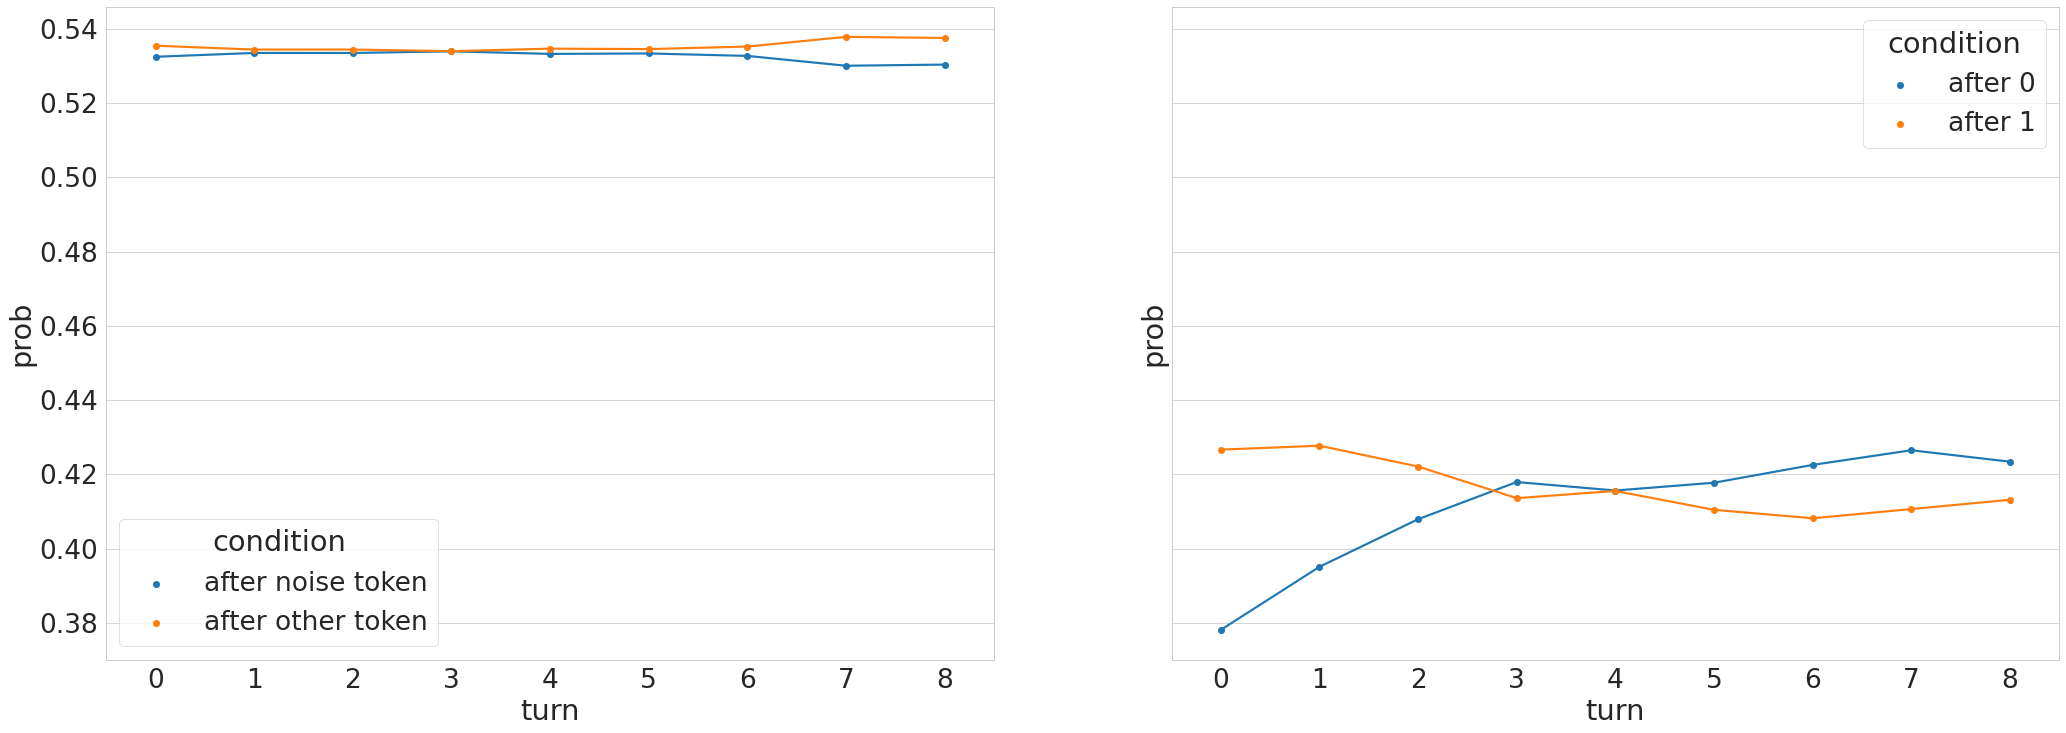

In [66]:
data = []

noise = [0.5324794832658659, 0.5335070968199509, 0.5335038136672091, 0.5339482142500649, 0.5332509060283926, 0.5333704351868614, 0.5327118284699583, 0.5300618360198712, 0.5303755071863462]
for i, n in enumerate(noise):
    data.append({"condition": "after noise token", "turn": i, "prob": n})
    
no_noise = [0.5354631303998393, 0.53442421325633, 0.53442849654834, 0.5339807338244494, 0.5346668254157241, 0.5345516733947143, 0.5352325882994804, 0.537851318115185, 0.5375381968005606]
for i, n in enumerate(no_noise):
    data.append({"condition": "after other token", "turn": i, "prob": n})



data = pd.DataFrame.from_records(data)

_, axes = plt.subplots(1, 2, figsize=(35, 12), sharey=True)
# plt.figure(figsize=(10, 10))
sns.pointplot(ax=axes[0], data=data, x="turn", y="prob", hue="condition")
# plt.ylim((0, 1))

data_2 = []
after_0 = [0.3780947411143967, 0.3950762783997905, 0.4079030503418036, 0.4179165733900455, 0.41563186322742424, 0.4177290918843091, 0.42253313184999913, 0.4264756773331581, 0.4233993503091271]
for i, n in enumerate(after_0):
    data_2.append({"condition": "after 0", "turn": i, "prob": n})

after_1 = [0.4266391045795913, 0.4277036238071697, 0.42208971246220744, 0.4135762664003001, 0.41550587560905705, 0.41043735842481266, 0.4081567511616348, 0.4106360314442512, 0.4131322223131404]
for i, n in enumerate(after_1):
    data_2.append({"condition": "after 1", "turn": i, "prob": n})

data_2 = pd.DataFrame.from_records(data_2)
sns.pointplot(ax=axes[1], data=data_2, x="turn", y="prob", hue="condition")

# plt.ylim((0, 1))
# sns.pointplot(x=turn, y=no_noise)
